In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='http://bit.ly/drinksbycountry'

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [5]:
pd.read_csv("beer-servings.csv")

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [6]:
data=pd.read_csv("beer-servings.csv")

In [7]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [8]:
#data.drop("Unnamed: 0",axis=1, inplace=True)

In [9]:
data=pd.read_csv("beer-servings.csv",index_col="Unnamed: 0")

In [10]:
data.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia


In [11]:
data.shape

(193, 6)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [13]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [14]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [15]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

#first method- imputation

In [16]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [17]:
num_cols=data[[ 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [18]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [19]:
#import simple imputer

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [22]:
imputer=imputer.fit(num_cols) #fit it to our data

In [23]:
num_cols=imputer.transform(num_cols) #transform our data

In [24]:
type(num_cols)

numpy.ndarray

In [25]:
num_cols=pd.DataFrame(num_cols,columns=[[ 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [26]:
num_cols.isna().sum() #now no null values will be present

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [27]:
data.isna().sum() 

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [28]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [29]:
data.drop([ 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],axis=1,inplace=True)

In [30]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [31]:
data=pd.concat([num_cols,data],axis=1)

In [32]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

#2nd method

In [45]:
data=pd.read_csv("beer-servings.csv",index_col="Unnamed: 0")

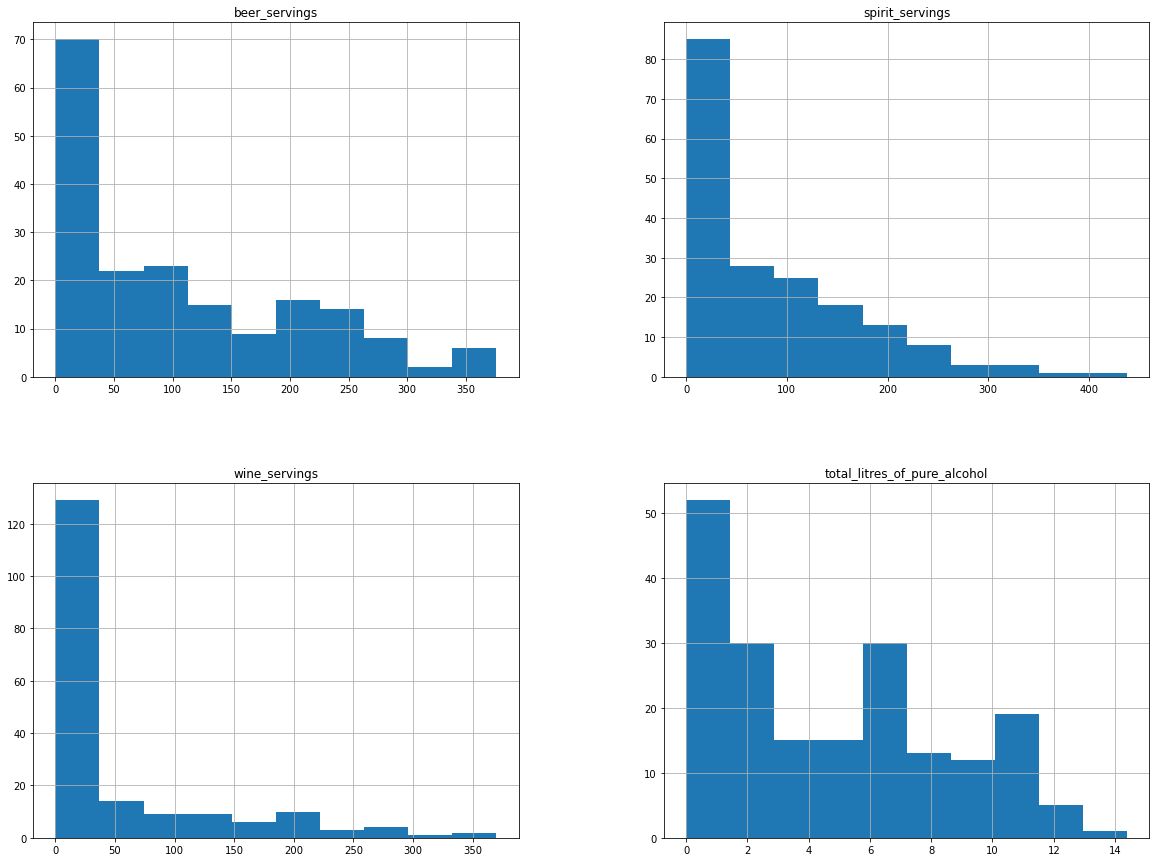

In [46]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [47]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [49]:
data["beer_servings"].fillna(data["beer_servings"].median())

0        0.0
1       89.0
2       25.0
3      245.0
4      217.0
       ...  
188     76.0
189    111.0
190      6.0
191     32.0
192     64.0
Name: beer_servings, Length: 193, dtype: float64

In [50]:
data['beer_servings']=data["beer_servings"].fillna(data["beer_servings"].median())

In [51]:
data["beer_servings"].isna().sum()

0

In [52]:
data.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia


In [53]:
for i in ['spirit_servings','wine_servings','total_litres_of_pure_alcohol']:
    data[i]=data[i].fillna(data[i].median())

In [54]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

#managing outiers

Text(0.5, 1.0, 'boxplot of beer-servings column')

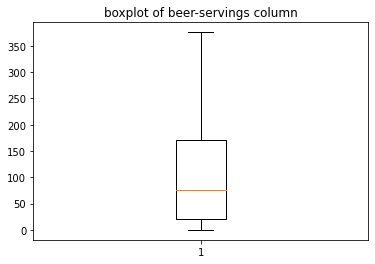

In [55]:
plt.boxplot(data["beer_servings"])
plt.title("boxplot of beer-servings column") 

In [56]:
#no outliers is present in boxplot of beer-servings column

Text(0.5, 1.0, 'boxplot of spirit_servings column')

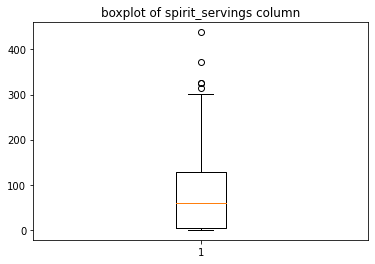

In [57]:
plt.boxplot(data["spirit_servings"])
plt.title("boxplot of spirit_servings column")

In [60]:
Q1=np.percentile(data["spirit_servings"],25,interpolation='midpoint')

In [65]:
Q2=np.percentile(data["spirit_servings"],50,interpolation='midpoint')

In [66]:
Q3=np.percentile(data["spirit_servings"],75,interpolation='midpoint')

In [67]:
print(Q1)

5.0


In [68]:
print(Q2)

60.0


In [69]:
print(Q3)

128.0


In [70]:
data["spirit_servings"].median()

60.0

In [71]:
IQR=Q3-Q1

In [72]:
print(IQR)

123.0


In [73]:
low_limit=Q1-1.5*IQR

In [74]:
up_limit=Q3+1.5*IQR

In [75]:
print(low_limit)

-179.5


In [76]:
print(up_limit)

312.5


In [77]:
outlier=[]

In [78]:
for x in data["spirit_servings"]:
    if ((x>up_limit)or (x<low_limit)):
        outlier.append(x)

In [79]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [80]:
#to drop outliers

In [81]:
ind=data["spirit_servings"]>up_limit

In [83]:
ind #gives boolean value

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: spirit_servings, Length: 193, dtype: bool

In [85]:
data.loc[ind].index # locate the index of these values

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [86]:
data.drop([15,68,73,141,144],inplace=True)

In [87]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1,Albania,89.0,132.0,54.0,4.90,Europe
2,Algeria,25.0,0.0,14.0,0.70,Africa
3,Andorra,245.0,138.0,312.0,12.40,Europe
4,Angola,217.0,57.0,45.0,5.90,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
6,Argentina,76.0,25.0,221.0,8.30,South America
7,Armenia,21.0,179.0,11.0,3.80,Europe
8,Australia,261.0,72.0,212.0,10.40,Oceania
9,Austria,279.0,75.0,191.0,9.70,Europe


In [112]:
#outliers in wine-servings column

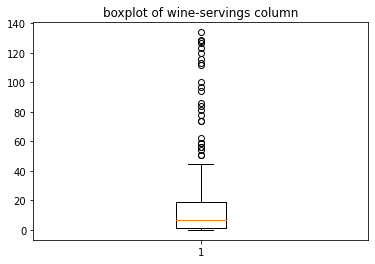

In [113]:
plt.boxplot(data['wine_servings'])
plt.title("boxplot of wine-servings column")
plt.show()

In [88]:
Q1=np.percentile(data["wine_servings"],25,interpolation='midpoint')

In [89]:
Q2=np.percentile(data["wine_servings"],50,interpolation='midpoint')

In [90]:
Q3=np.percentile(data["wine_servings"],75,interpolation='midpoint')

In [91]:
print(Q1)

1.0


In [92]:
print(Q2)

9.0


In [93]:
print(Q3)

57.5


In [94]:
data['wine_servings'].median()

9.0

In [95]:
IQR=Q3-Q1

In [96]:
print(IQR)

56.5


In [97]:
low_limit=Q1-1.5*IQR

In [98]:
upper_limit=Q3+1.5*IQR

In [99]:
print(low_limit)

-83.75


In [100]:
print(upper_limit)

142.25


In [101]:
outlier=[]

In [102]:
for x in data["wine_servings"]:
    if((x>upper_limit)or (x<low_limit)):
        outlier.append(x)

In [103]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [105]:
ind=data["wine_servings"]>upper_limit

In [106]:
ind

0      False
1      False
2      False
3       True
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: wine_servings, Length: 188, dtype: bool

In [107]:
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [110]:
data.drop([ 3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],inplace=True)

In [111]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
4,Angola,217.0,57.0,45.0,5.9,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.9,North America


In [114]:
#outliers present in total_liters_of_pure_alcohol column

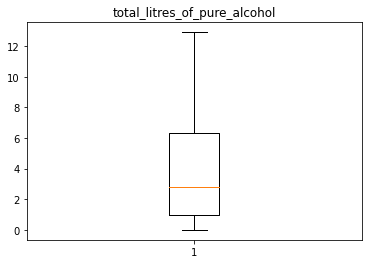

In [115]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title("total_litres_of_pure_alcohol")
plt.show()

In [141]:
Q1=np.percentile(data["total_litres_of_pure_alcohol"],25,interpolation='midpoint')

In [142]:
Q1=np.percentile(data["total_litres_of_pure_alcohol"],50,interpolation='midpoint')

In [143]:
Q1=np.percentile(data["total_litres_of_pure_alcohol"],75,interpolation='midpoint')

In [144]:
print(Q1)

6.3


In [145]:
print(Q2)

9.0


In [146]:
print(Q3)

57.5


In [147]:
data["total_litres_of_pure_alcohol"].median()

2.8

In [148]:
IQR=Q3-Q1

In [149]:
print(IQR)

51.2


In [150]:
low_limit=Q1-1.5*IQR

In [151]:
upper_limit=Q3+1.5*IQR

In [152]:
print(low_limit)

-70.50000000000001


In [153]:
print(upper_limit)

134.3


In [154]:
outlier=[]

In [155]:
for x in data["total_litres_of_pure_alcohol"]:
    if((x>upper_limit)or (x<low_limit)):
        outlier.append(x)

In [156]:
outlier.append(x)

In [157]:
outlier

[4.7]

In [158]:
ind=data["total_litres_of_pure_alcohol"]>upper_limit

In [159]:
ind

0      False
1      False
2      False
4      False
5      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: total_litres_of_pure_alcohol, Length: 162, dtype: bool

In [160]:
data.loc[ind].index

Int64Index([], dtype='int64')

In [161]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1,Albania,89.0,132.0,54.0,4.90,Europe
2,Algeria,25.0,0.0,14.0,0.70,Africa
4,Angola,217.0,57.0,45.0,5.90,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
7,Armenia,21.0,179.0,11.0,3.80,Europe
10,Azerbaijan,21.0,46.0,5.0,1.30,Europe
11,Bahamas,122.0,176.0,51.0,6.30,North America
12,Bahrain,42.0,63.0,7.0,2.00,Asia
13,Bangladesh,76.0,60.0,9.0,4.25,Asia
